In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, log_loss
from sklearn.model_selection import train_test_split

In [2]:
from tqdm import tqdm

# RÉSEAU DE NEURONES (2 COUCHES)

In [3]:
def initialisation(X, n1, n2):
    
    n0 = X.shape[0]
    
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2, 
        'b2' : b2
    }
    
    return parametres

In [4]:
def forward_propagation(X, parametres):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1' : A1,
        'A2' : A2
    }
    
    return activations

In [5]:
#def log_loss(A2, y):
    #return 1 / len(y) * np.sum(-y * np.log(A2) - (1 - y) * np.log(1 - A2))

In [23]:
def back_propagation(parametres, activations, X, y):
    
    m = y.shape[1]
    
    W2 = parametres['W2'] 
    A1 = activations['A1']
    A2 = activations['A2']
    
    dZ2 = A2-y
    dZ1 = W2.T.dot(dZ2) * A1 * (1-A1)
    
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)    
    
    gradients = {
        'dW1' : dW1, 
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [7]:
def update(gradients, parametres, learning_rate):
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2, 
        'b2' : b2
    }
    
    return parametres

In [56]:
def predict(X, parametres):
    
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    
    return A2 >= 0.5

In [151]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):

    n2 = y_train.shape[0]
    parametres = initialisation(X_train, n1, n2)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X_train, parametres)
        A2 = activations['A2']
        gradients = back_propagation(parametres, activations, X_train, y_train)
        parametres = update(gradients, parametres, learning_rate)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(y_train, A2))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))



    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    

    return parametres

In [152]:
def evaluation(X_test, y_test, parametres):
    # y_pred du jeu de test avec les paramètres finaux
    y_pred = predict(X_test, parametres)
    
    # accuracy score et matrice de confusion
    accuracy_test = accuracy_score(y_test.T, y_pred.T)
    
    # crosstab
    crosstab = pd.crosstab(y_test, y_pred.astype('int'))
    crosstab.index = ['test 0', 'test 1']
    crosstab.columns = ['pred 0', 'pred 1']
    crosstab = crosstab.T
    
    print(f"L'accuracy sur le jeu de test est de {accuracy_test}")
    return crosstab

## Test avec un cercle

In [153]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [155]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 706.12it/s]


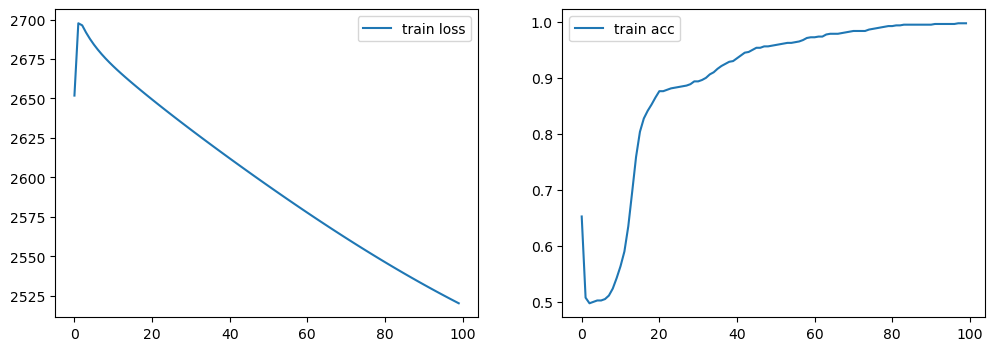

In [157]:
parametres = neural_network(X_train, y_train, n1=50, learning_rate = 0.1, n_iter = 1000)

In [158]:
evaluation(X_test, y_test, parametres)

L'accuracy sur le jeu de test est de 1.0


,test 0,test 1
pred 0,100,0
pred 1,0,100


## Test sur les photos de chiens et chats

In [159]:
import h5py
import utilities

In [160]:
X_train, y_train, X_test, y_test = utilities.load_data()

In [161]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [162]:
# standardisation entre 0 et 1
X_train_scaler = X_train/255
X_test_scaler = X_test/255

# vectorisation des images
X_train_scaler = X_train_scaler.reshape(X_train_scaler.shape[0], X_train_scaler.shape[1]*X_train_scaler.shape[2])
X_test_scaler = X_test_scaler.reshape(X_test_scaler.shape[0], X_test_scaler.shape[1]*X_test_scaler.shape[2])

# transposition des matrices
X_train_scaler = X_train_scaler.T
X_test_scaler = X_test_scaler.T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [163]:
print(X_train_scaler.shape)
print(y_train.shape)
print(X_test_scaler.shape)
print(y_test.shape)

(4096, 1000)
(1, 1000)
(4096, 200)
(1, 200)


100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:04<00:00, 41.27it/s]


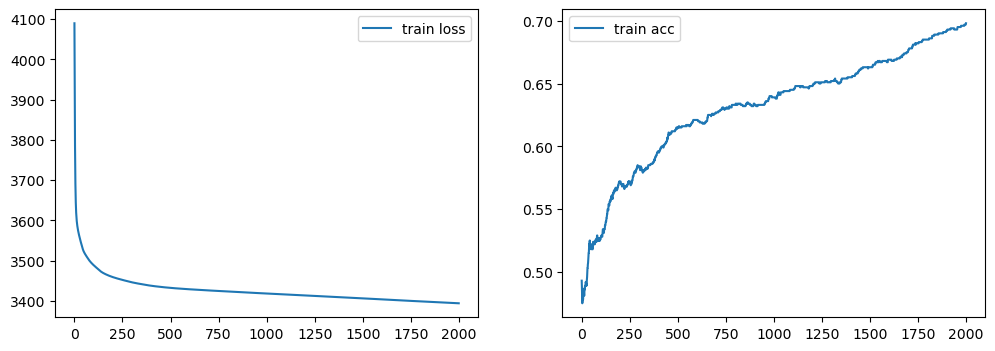

In [166]:
parametres = neural_network(
    X_train=X_train_scaler, y_train=y_train, n1=32,
    learning_rate = 0.01, n_iter = 20000)

In [167]:
evaluation(X_test_scaler, y_test, parametres)

L'accuracy sur le jeu de test est de 0.515


,test 0,test 1
pred 0,47,44
pred 1,53,56
